In [1]:
# Importar as bibliotecas
import matplotlib.pyplot as plt
import pymannkendall as mk
import numpy as np
from scipy import stats
import pandas as pd


In [2]:
data = pd.read_csv("/home/darkcover/Documentos/Out/dados/data_final1.csv")
data.head()

,Unnamed: 0,Rodada,level,apostar,acerto,contagem,odd,odd_entrada,odd_saida,media5,media10,media20,media40,media80,media160,media320,media640
0,0,0.0,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1.0,1.0,0.0,1.0,0.0,3.85,11.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2.0,1.0,0.0,1.0,0.0,6.96,9.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3.0,1.0,0.0,1.0,0.0,5.41,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,4.0,1.0,0.0,0.0,0.0,1.05,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data = data.drop(columns=['Unnamed: 0'])
# Excluir a linha com índice 0
data = data.drop(0).reset_index(drop=True)

data.head()

,Rodada,level,apostar,acerto,contagem,odd,odd_entrada,odd_saida,media5,media10,media20,media40,media80,media160,media320,media640
0,1.0,1.0,0.0,1.0,0.0,3.85,11.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,1.0,0.0,1.0,0.0,6.96,9.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,1.0,0.0,1.0,0.0,5.41,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,1.0,0.0,0.0,0.0,1.05,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,1.0,0.0,1.0,0.0,1.70,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data.describe()

,Rodada,level,apostar,acerto,contagem,odd,odd_entrada,odd_saida,media5,media10,media20,media40,media80,media160,media320,media640
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,100000.000000,14.790684,0.019170,0.761199,5.970030,16.353780,6.244266,6.244251,6.244033,6.243837,6.243486,6.242877,6.241609,6.239014,6.233853,6.223676
std,57734.882581,8.389179,0.137123,0.426352,4.327218,1964.967513,3.039212,3.039196,1.361300,0.962009,0.681894,0.487010,0.361126,0.295744,0.300835,0.372428
min,1.000000,1.000000,0.000000,0.000000,-9.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.500000,8.000000,0.000000,1.000000,2.000000,1.310000,4.000000,4.000000,5.400000,5.600000,5.800000,5.925000,6.012500,6.081250,6.131250,6.162500
50%,100000.000000,14.000000,0.000000,1.000000,6.000000,1.960000,6.000000,6.000000,6.200000,6.200000,6.250000,6.250000,6.237500,6.243750,6.240625,6.240625
75%,149999.500000,21.000000,0.000000,1.000000,9.000000,3.900000,9.000000,9.000000,7.200000,6.900000,6.700000,6.575000,6.475000,6.400000,6.356250,6.320312
max,199999.000000,32.000000,1.000000,1.000000,14.000000,837137.310000,11.000000,11.000000,10.800000,10.000000,9.150000,8.300000,7.512500,7.287500,7.037500,6.814063


In [6]:
print("LEVEL")
# Garanta que 'level' seja do tipo inteiro
data['level'] = data['level'].astype(int)

# Verifique os valores únicos em 'level'
unique_classes1 = data['level'].unique()
print(unique_classes1)

print("APOSTAR")
# Garanta que 'apostar' seja do tipo inteiro
data['apostar'] = data['apostar'].astype(int)

# Verifique os valores únicos em 'apostar'
unique_classes2 = data['apostar'].unique()
print(unique_classes2)

print("ACERTO")
# Garanta que 'acerto' seja do tipo inteiro
data['acerto'] = data['acerto'].astype(int)

# Verifique os valores únicos em 'acerto'
unique_classes3 = data['acerto'].unique()
print(unique_classes3)

print("CONTAGEM")
# Garanta que 'contagem' seja do tipo inteiro
data['contagem'] = data['contagem'].astype(int)

# Verifique os valores únicos em 'contagem'
unique_classes4 = data['contagem'].unique()
print(unique_classes4)

print("ODD_ENTRADA")
# Garanta que 'odd_entrada' seja do tipo inteiro
data['odd_entrada'] = data['odd_entrada'].astype(int)

# Verifique os valores únicos em 'odd_entrada'
unique_classes5 = data['odd_entrada'].unique()
print(unique_classes5)

print("ODD_SAIDA")
# Garanta que 'odd_saida' seja do tipo inteiro
data['odd_saida'] = data['odd_saida'].astype(int)

# Verifique os valores únicos em 'odd_saida'
unique_classes6 = data['odd_saida'].unique()
print(unique_classes6)

LEVEL
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32]
APOSTAR
[0 1]
ACERTO
[1 0]
CONTAGEM
[ 0  1  2  3 -2 -1 -3 -4 -5  4  5  6  7  8  9 10 11 12 13 14 -6 -8 -7 -9]
ODD_ENTRADA
[11  9 10  2  6  4  3  7  5  8  1]
ODD_SAIDA
[ 9 10  2  6  4  3  7  5  8  1 11]


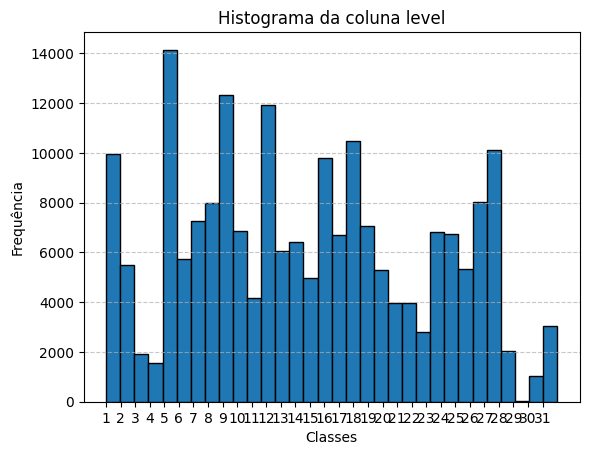

In [7]:
# Configurar o histograma
plt.hist(data['level'], bins=32, edgecolor='k')  # O número de bins deve corresponder ao número de classes (32 no seu caso)
plt.title('Histograma da coluna level')
plt.xlabel('Classes')
plt.ylabel('Frequência')
plt.xticks(range(1, 32))  # Rótulos do eixo x de 1 a 12
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar o histograma
plt.show()


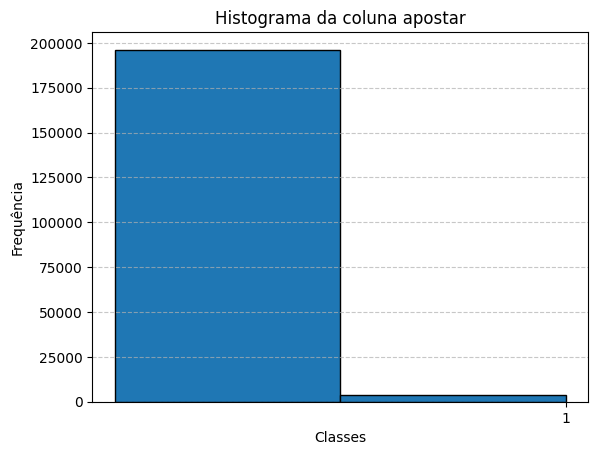

In [8]:
# Configurar o histograma
plt.hist(data['apostar'], bins=2, edgecolor='k')  # O número de bins deve corresponder ao número de classes (2 no seu caso)
plt.title('Histograma da coluna apostar')
plt.xlabel('Classes')
plt.ylabel('Frequência')
plt.xticks(range(1, 2))  # Rótulos do eixo x de 1 a 2
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar o histograma
plt.show()


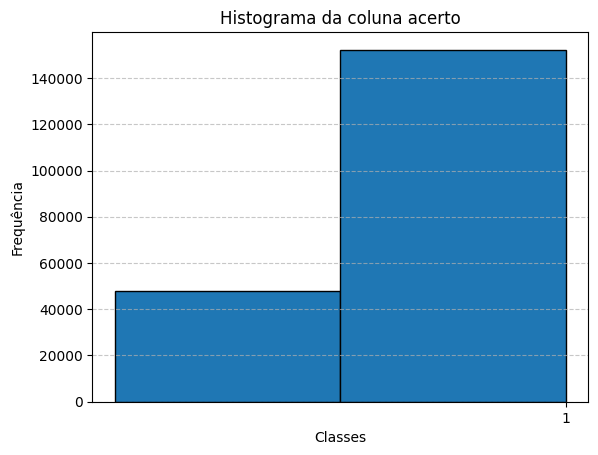

In [10]:
# Configurar o histograma
plt.hist(data['acerto'], bins=2, edgecolor='k')  # O número de bins deve corresponder ao número de classes (3 no seu caso)
plt.title('Histograma da coluna acerto')
plt.xlabel('Classes')
plt.ylabel('Frequência')
plt.xticks(range(1, 2))  # Rótulos do eixo x de 1 a 3
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar o histograma
plt.show()


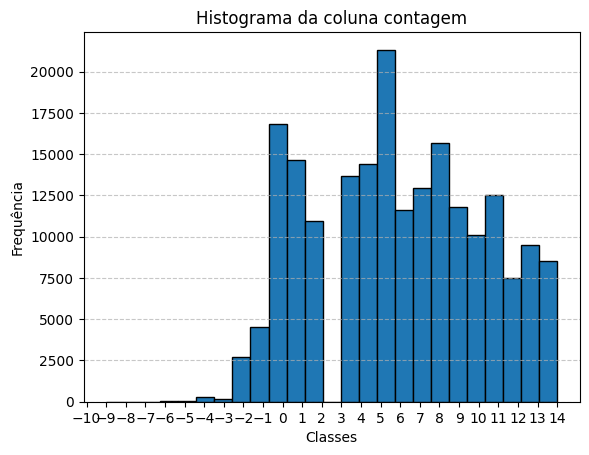

In [11]:
# Configurar o histograma
plt.hist(data['contagem'], bins=25, edgecolor='k')  # O número de bins deve corresponder ao número de classes (25 no seu caso)
plt.title('Histograma da coluna contagem')
plt.xlabel('Classes')
plt.ylabel('Frequência')
plt.xticks(range(-10, 15))  # Rótulos do eixo x de -10 a 15
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar o histograma
plt.show()


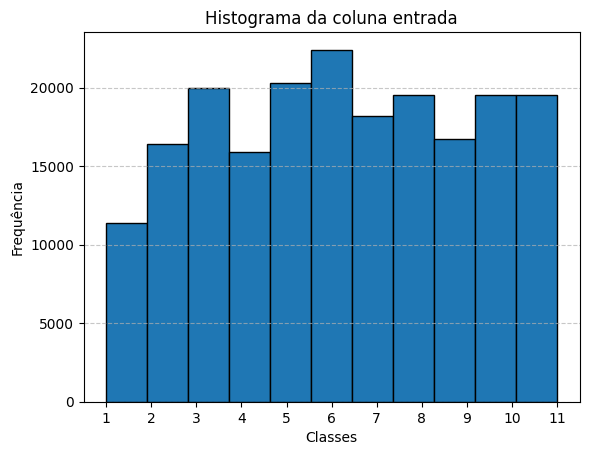

In [12]:
# Configurar o histograma
plt.hist(data['odd_entrada'], bins=11, edgecolor='k')  # O número de bins deve corresponder ao número de classes (12 no seu caso)
plt.title('Histograma da coluna entrada')
plt.xlabel('Classes')
plt.ylabel('Frequência')
plt.xticks(range(1, 12))  # Rótulos do eixo x de 1 a 12
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar o histograma
plt.show()


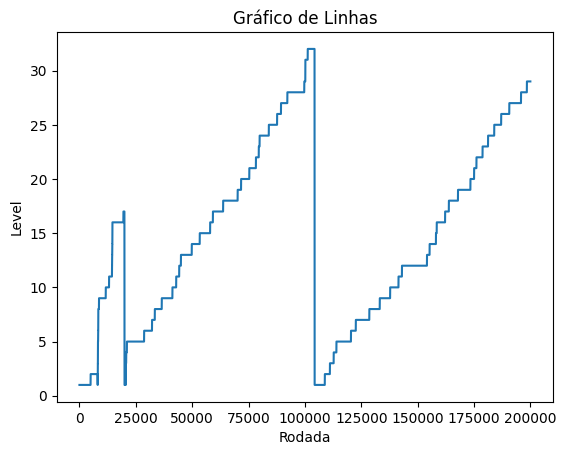

In [13]:
# Dados para o gráfico
x = data['Rodada']
y = data['level']

# Criar o gráfico de linhas
plt.plot(x, y)

# Adicionar título e rótulos dos eixos
plt.title('Gráfico de Linhas')
plt.xlabel('Rodada')
plt.ylabel('Level')

# Exibir o gráfico
plt.show()


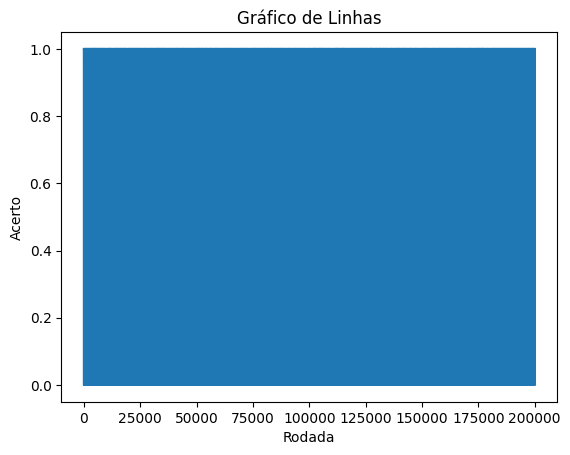

In [14]:
# Dados para o gráfico
x = data['Rodada']
y = data['acerto']

# Criar o gráfico de linhas
plt.plot(x, y)

# Adicionar título e rótulos dos eixos
plt.title('Gráfico de Linhas')
plt.xlabel('Rodada')
plt.ylabel('Acerto')

# Exibir o gráfico
plt.show()


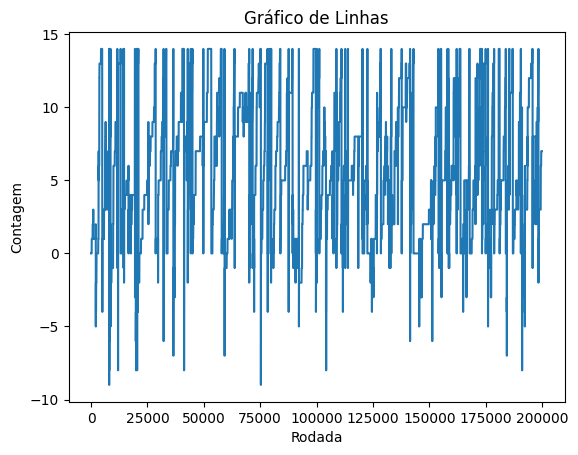

In [15]:
# Dados para o gráfico
x = data['Rodada']
y = data['contagem']

# Criar o gráfico de linhas
plt.plot(x, y)

# Adicionar título e rótulos dos eixos
plt.title('Gráfico de Linhas')
plt.xlabel('Rodada')
plt.ylabel('Contagem')

# Exibir o gráfico
plt.show()


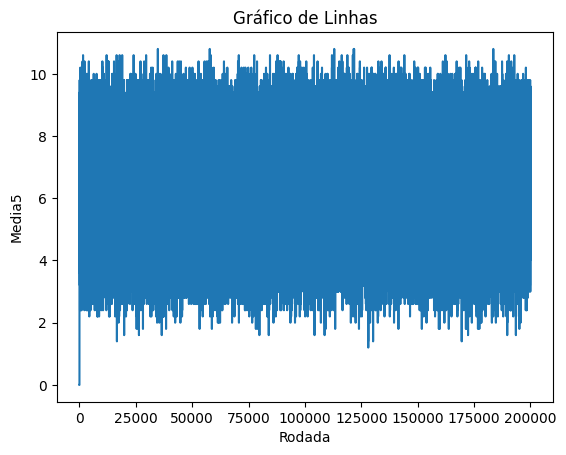

In [16]:
# Dados para o gráfico
x = data['Rodada']
y = data['media5']

# Criar o gráfico de linhas
plt.plot(x, y)

# Adicionar título e rótulos dos eixos
plt.title('Gráfico de Linhas')
plt.xlabel('Rodada')
plt.ylabel('Media5')

# Exibir o gráfico
plt.show()


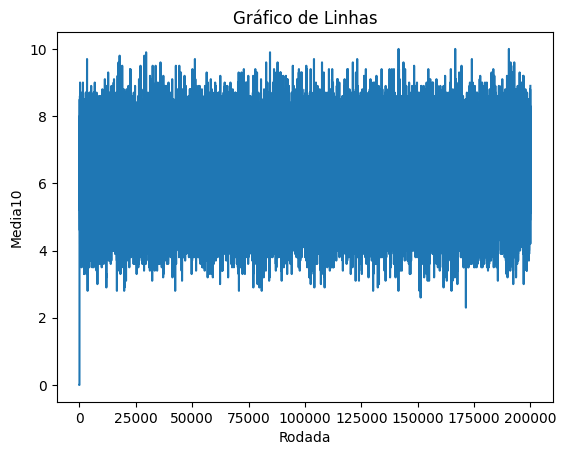

In [17]:
# Dados para o gráfico
x = data['Rodada']
y = data['media10']

# Criar o gráfico de linhas
plt.plot(x, y)

# Adicionar título e rótulos dos eixos
plt.title('Gráfico de Linhas')
plt.xlabel('Rodada')
plt.ylabel('Media10')

# Exibir o gráfico
plt.show()


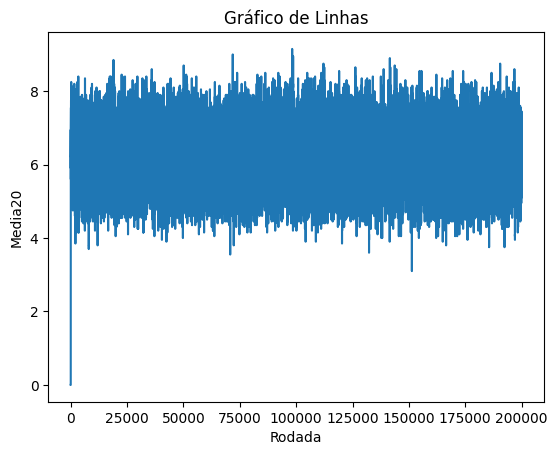

In [18]:
# Dados para o gráfico
x = data['Rodada']
y = data['media20']

# Criar o gráfico de linhas
plt.plot(x, y)

# Adicionar título e rótulos dos eixos
plt.title('Gráfico de Linhas')
plt.xlabel('Rodada')
plt.ylabel('Media20')

# Exibir o gráfico
plt.show()


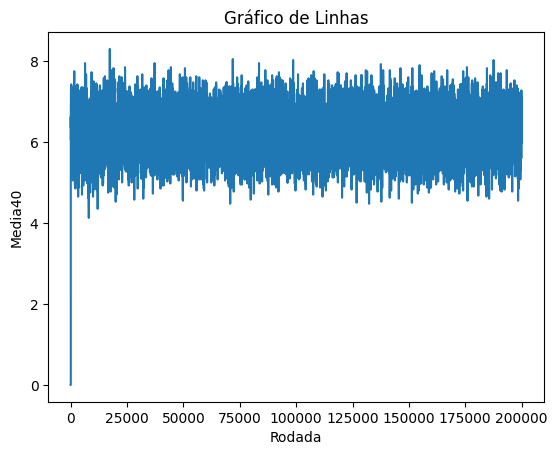

In [19]:
# Dados para o gráfico
x = data['Rodada']
y = data['media40']

# Criar o gráfico de linhas
plt.plot(x, y)

# Adicionar título e rótulos dos eixos
plt.title('Gráfico de Linhas')
plt.xlabel('Rodada')
plt.ylabel('Media40')

# Exibir o gráfico
plt.show()


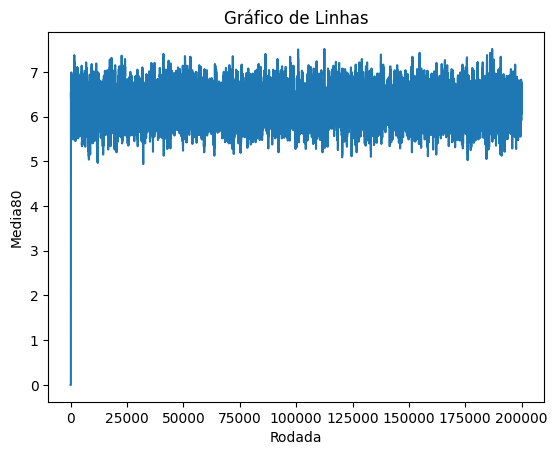

In [20]:
# Dados para o gráfico
x = data['Rodada']
y = data['media80']

# Criar o gráfico de linhas
plt.plot(x, y)

# Adicionar título e rótulos dos eixos
plt.title('Gráfico de Linhas')
plt.xlabel('Rodada')
plt.ylabel('Media80')

# Exibir o gráfico
plt.show()


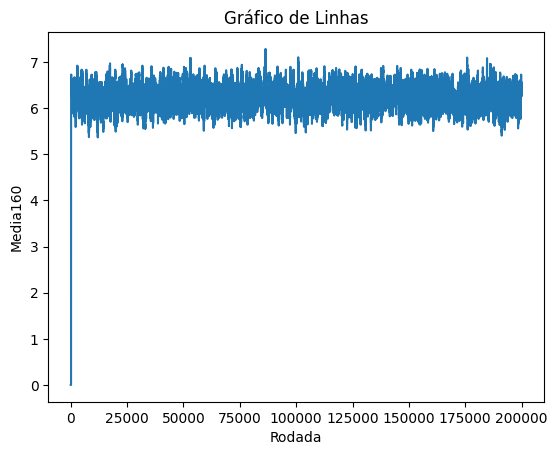

In [21]:
# Dados para o gráfico
x = data['Rodada']
y = data['media160']

# Criar o gráfico de linhas
plt.plot(x, y)

# Adicionar título e rótulos dos eixos
plt.title('Gráfico de Linhas')
plt.xlabel('Rodada')
plt.ylabel('Media160')

# Exibir o gráfico
plt.show()


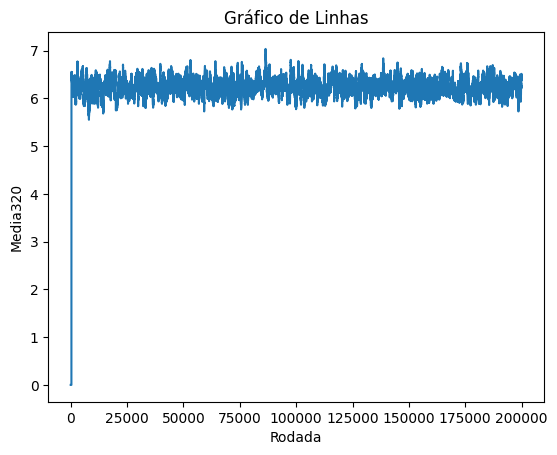

In [22]:
# Dados para o gráfico
x = data['Rodada']
y = data['media320']

# Criar o gráfico de linhas
plt.plot(x, y)

# Adicionar título e rótulos dos eixos
plt.title('Gráfico de Linhas')
plt.xlabel('Rodada')
plt.ylabel('Media320')

# Exibir o gráfico
plt.show()


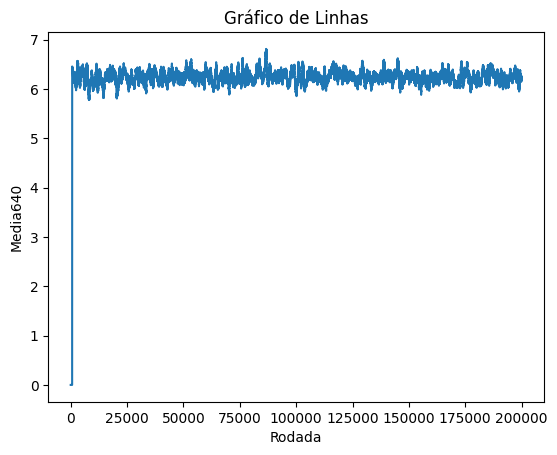

In [23]:
# Dados para o gráfico
x = data['Rodada']
y = data['media640']

# Criar o gráfico de linhas
plt.plot(x, y)

# Adicionar título e rótulos dos eixos
plt.title('Gráfico de Linhas')
plt.xlabel('Rodada')
plt.ylabel('Media640')

# Exibir o gráfico
plt.show()


In [24]:
data = data.tail(20000).reset_index(drop=True)

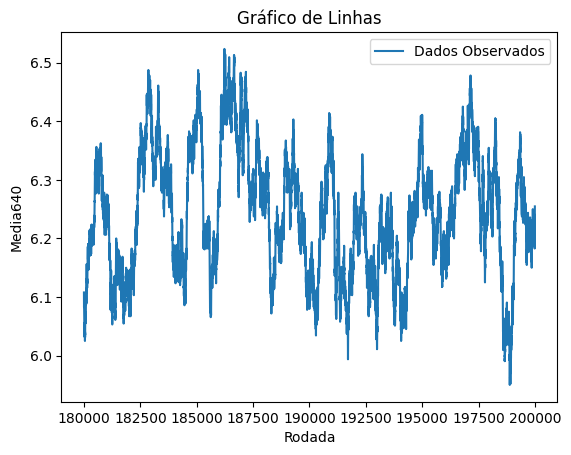

In [25]:
x = data['Rodada']
y = data['media640']

# Criar o gráfico de linhas
plt.plot(x, y, label='Dados Observados')

# Adicionar título e rótulos dos eixos
plt.title('Gráfico de Linhas')
plt.xlabel('Rodada')
plt.ylabel('Media640')
plt.legend()
plt.show()

# Teste de Tendência (Mann-Kendall)
result = mk.original_test(y)
print("Resultado do Teste de Mann-Kendall:")
print(result)

# Ajustar uma linha de tendência (Regressão Linear)
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept

# Plotar os dados e a linha de tendência
plt.plot(x, y, label='Dados Observados')
plt.plot(x, line, color='red', label='Linha de Tendência')

# Adicionar título e rótulos dos eixos
plt.title('Gráfico de Linhas com Tendência')
plt.xlabel('Rodada')
plt.ylabel('Media640')
plt.legend()
plt.show()

# Exibir informações sobre a linha de tendência
print(f"Slope: {slope}, Intercept: {intercept}, R-value: {r_value}, P-value: {p_value}, Std_err: {std_err}")
